In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
ua = pd.read_csv('datas/mars_tianchi_user_actions.csv', parse_dates='Ds', date_parser=dateparse)
so = pd.read_csv('datas/mars_tianchi_songs.csv')

In [3]:
data = pd.merge(ua, so, on=['song_id'])
data.head()

,user_id,song_id,gmt_create,action_type,Ds,artist_id,publish_time,song_init_plays,language,gender
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,1426406400,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
1,57b36cad7d86cdc69e8f18138f8f4741,effb071415be51f11e845884e67c0f8c,1426424400,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
2,dfa6fddc693133bbaa6ed1076d877557,effb071415be51f11e845884e67c0f8c,1426420800,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
3,b2982712434c578eeffda9188f9d993b,effb071415be51f11e845884e67c0f8c,1426381200,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
4,ef23d47c177f4cc9461752199da22877,effb071415be51f11e845884e67c0f8c,1426424400,2,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2


In [4]:
arts = data[data.action_type == 1].groupby(['artist_id', 'Ds'])['action_type'].sum()
arts.head()

artist_id                         Ds      
023406156015ef87f99521f3b343f71f  20150301    482
                                  20150302    449
                                  20150303    474
                                  20150304    458
                                  20150305    398
Name: action_type, dtype: int64

In [5]:
arts.to_csv('datas/arts.csv')

In [6]:
arts = pd.read_csv('datas/arts.csv', names=['artist_id', 'Ds', 'plays'], parse_dates='Ds', date_parser=dateparse, 
                   index_col='Ds')

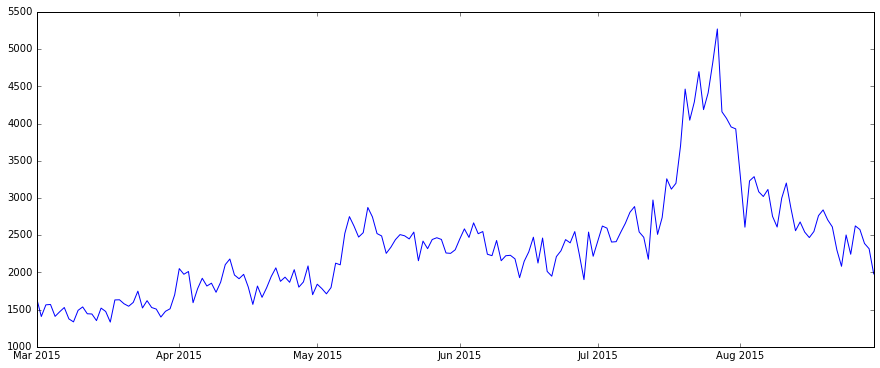

In [7]:
one = arts[arts.artist_id == 'c5f0170f87a2fbb17bf65dc858c745e2']
one.pop('artist_id')
plt.plot(one)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [9]:
ts = pd.Series(data=one['plays'], index=one.index)
ts.head()

Ds
2015-03-01    1651
2015-03-02    1407
2015-03-03    1564
2015-03-04    1569
2015-03-05    1409
Name: plays, dtype: int64

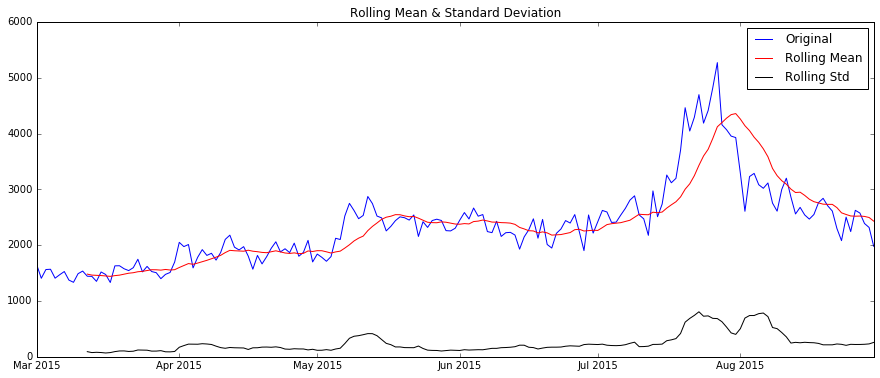

Results of Dickey-Fuller Test:
Test Statistic                  -2.321605
p-value                          0.165095
#Lags Used                       7.000000
Number of Observations Used    175.000000
Critical Value (5%)             -2.878202
Critical Value (1%)             -3.468280
Critical Value (10%)            -2.575653
dtype: float64


In [10]:
test_stationarity(ts)

# Log

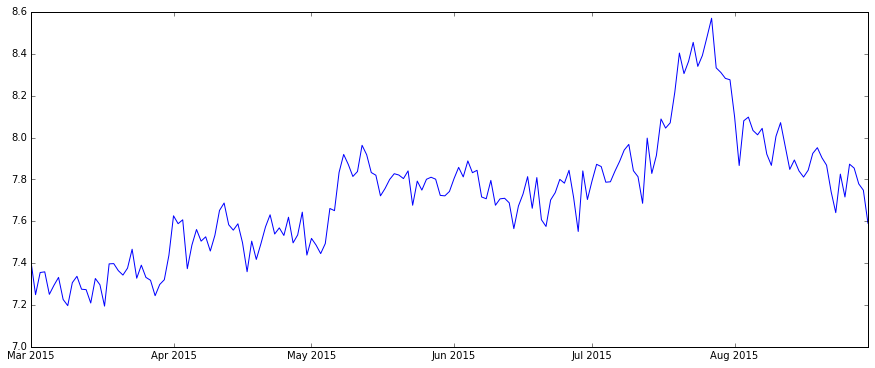

In [11]:
ts_log = np.log(ts)
plt.plot(ts_log)

# Smoothing

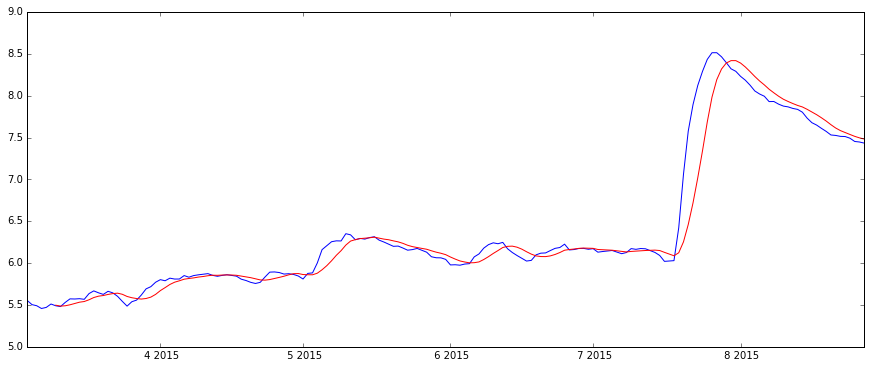

In [19]:
# test
ts_log = np.log(trend)
moving_avg = ts_log.rolling(window=7,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

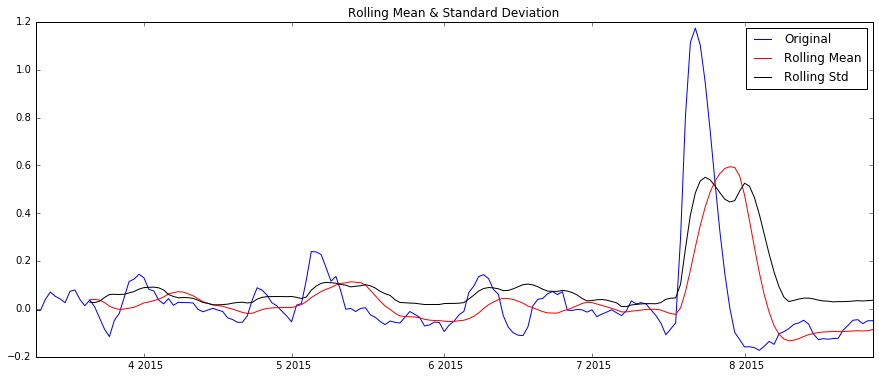

Results of Dickey-Fuller Test:
Test Statistic                  -3.515636
p-value                          0.007594
#Lags Used                      10.000000
Number of Observations Used    160.000000
Critical Value (5%)             -2.879780
Critical Value (1%)             -3.471896
Critical Value (10%)            -2.576495
dtype: float64


In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# Exp

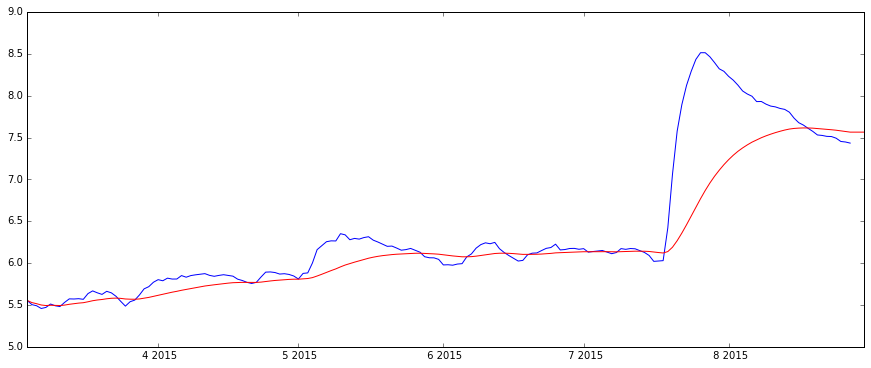

In [21]:
expwighted_avg = ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

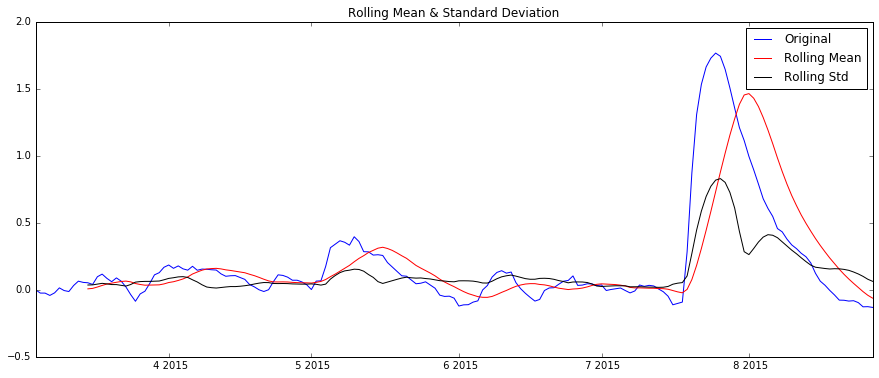

Results of Dickey-Fuller Test:


LinAlgError: SVD did not converge

In [22]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Difference

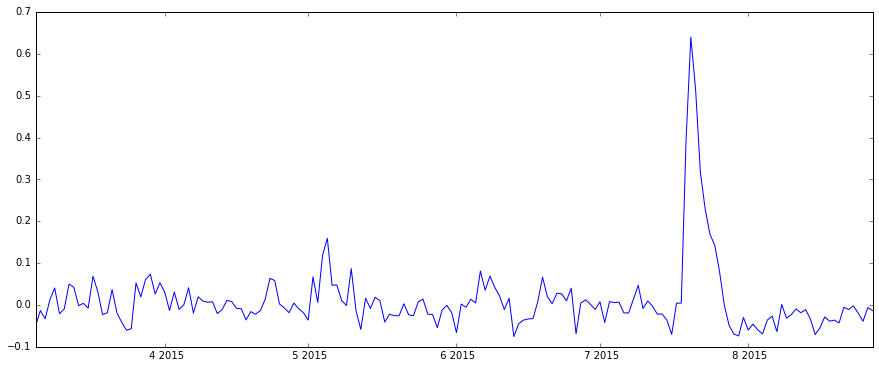

In [23]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

# ARIMA

In [44]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

In [47]:
#ts_log_diff = residual

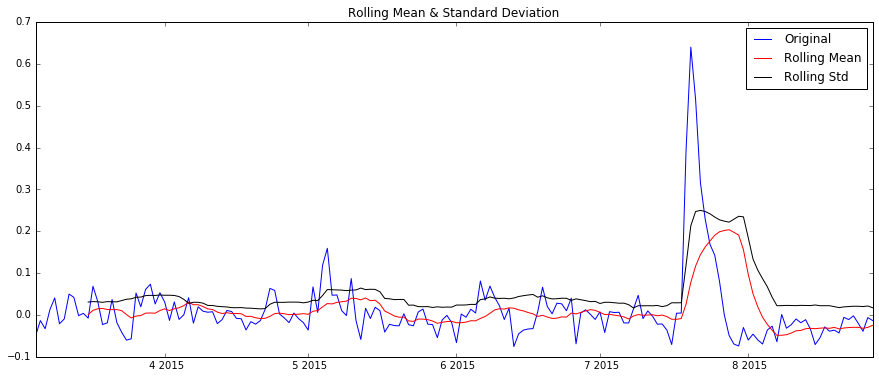

Results of Dickey-Fuller Test:
Test Statistic                  -4.202348
p-value                          0.000653
#Lags Used                       8.000000
Number of Observations Used    167.000000
Critical Value (5%)             -2.879008
Critical Value (1%)             -3.470126
Critical Value (10%)            -2.576083
dtype: float64


In [49]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

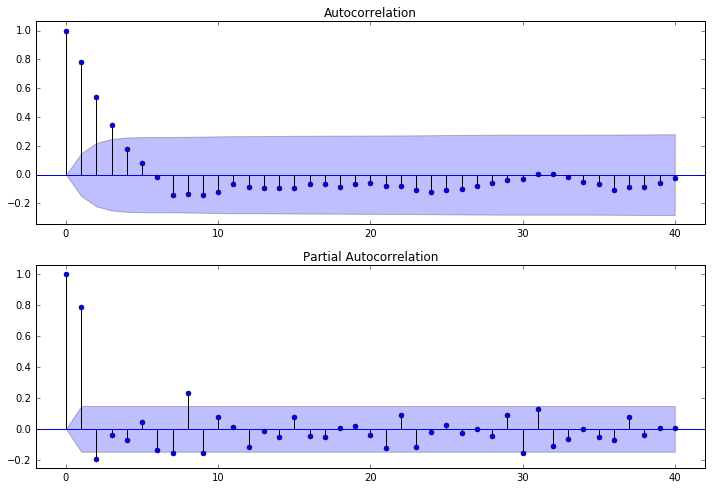

In [50]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff,lags=40,ax=ax2)

In [51]:
arma_mod20 = sm.tsa.ARMA(ts_log_diff,(1,0)).fit() 
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic) 
arma_mod30 = sm.tsa.ARMA(ts_log_diff,(1,2)).fit() 
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic) 
arma_mod40 = sm.tsa.ARMA(ts_log_diff,(1,3)).fit() 
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic) 
arma_mod50 = sm.tsa.ARMA(ts_log_diff,(2,0)).fit() 
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

(-532.5418286638337, -523.03037667871922, -528.68403086263277)
(-534.9886834828592, -519.13626350766845, -528.5590204808575)
(-534.6027613256197, -515.5798573553908, -526.88716572321766)
(-537.3551357971685, -524.67319981701587, -532.21140539556711)


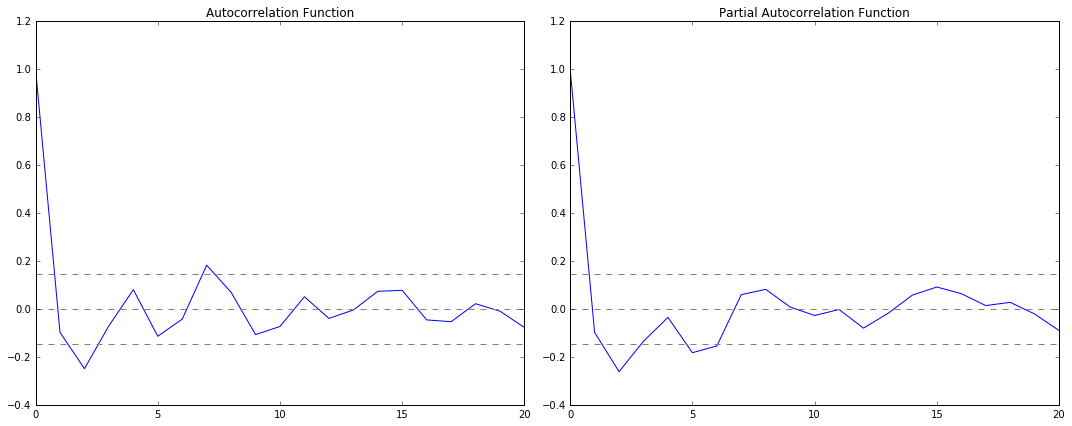

In [21]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [52]:
from statsmodels.tsa.arima_model import ARIMA

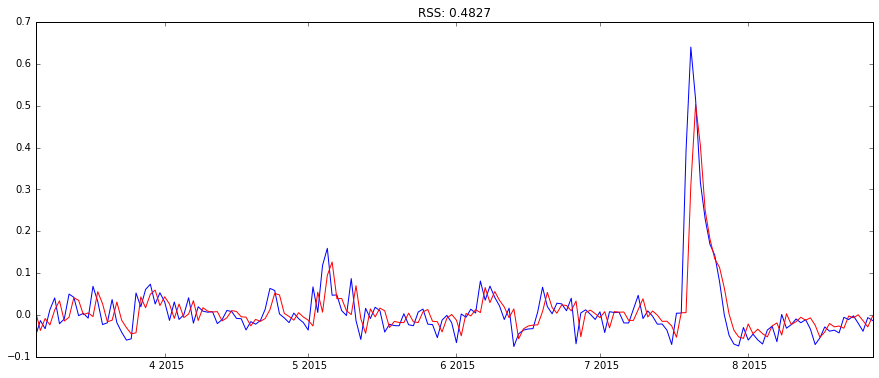

In [108]:
model = ARIMA(ts_log_diff, order=(1, 0, 0))  
results_ARIMA = model.fit(maxiter=1000000)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

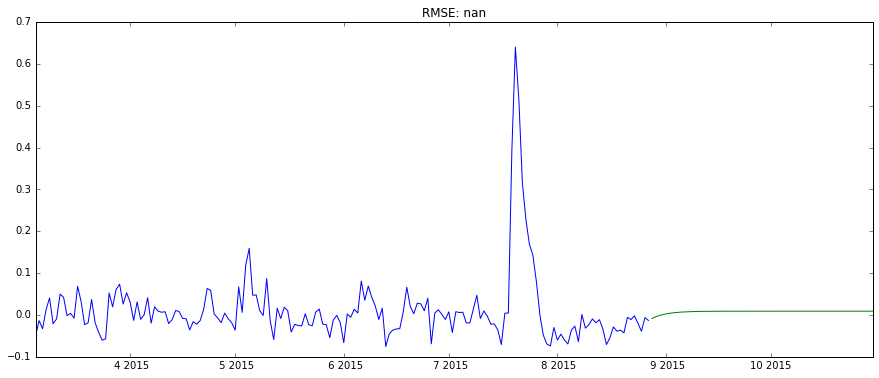

In [110]:
# fit
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
#plt.plot(ts_log)
#plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_log)**2)/len(ts_log)))

# predict
pred = results_ARIMA.predict(start='20150828', end='20151030')
plt.plot(ts_log_diff)
plt.plot(pred)

pred_ARIMA_diff_cumsum = pred.cumsum()
pred_ARIMA_log = pd.Series(ts_log.ix[len(ts_log) - 1], index=pred.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA = np.exp(pred_ARIMA_log)
#plt.plot(trend)
#plt.plot(pred_ARIMA)

# STL decomposition

/usr/local/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


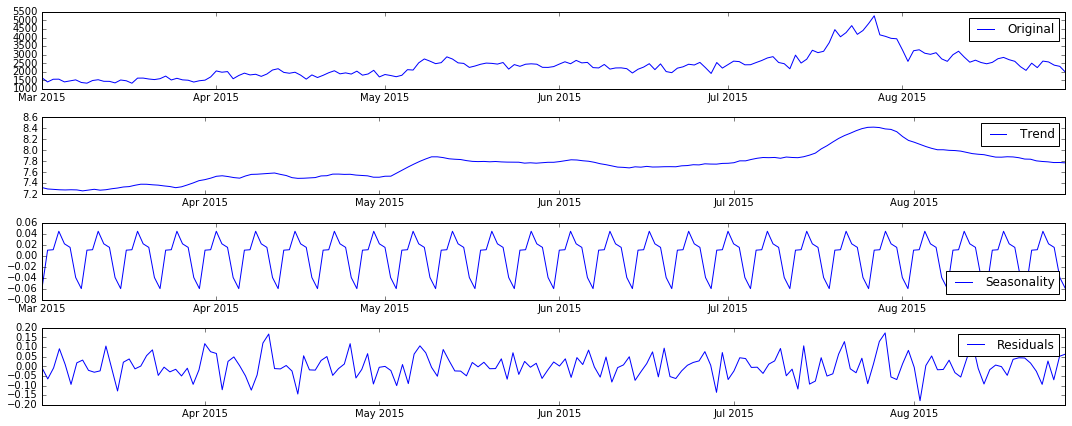

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

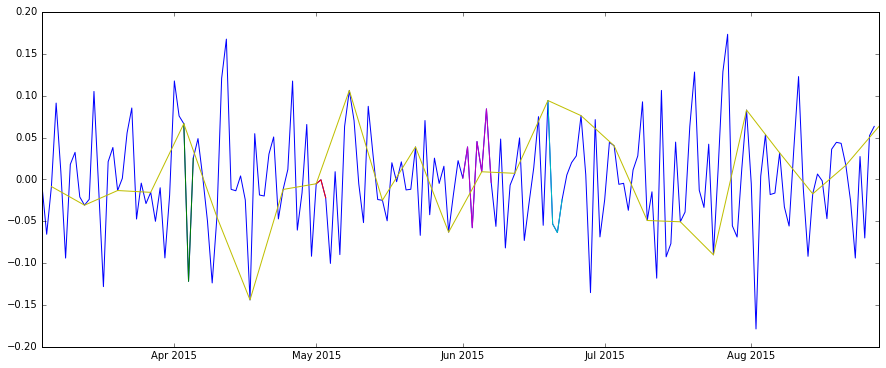

In [13]:
plt.plot(residual)
plt.plot(residual['20150403':'20150405'])
plt.plot(residual['20150501':'20150503'])
plt.plot(residual['20150619':'20150622'])
plt.plot(residual['20150601':'20150607'])
plt.plot(residual.resample('W-FRI').last())

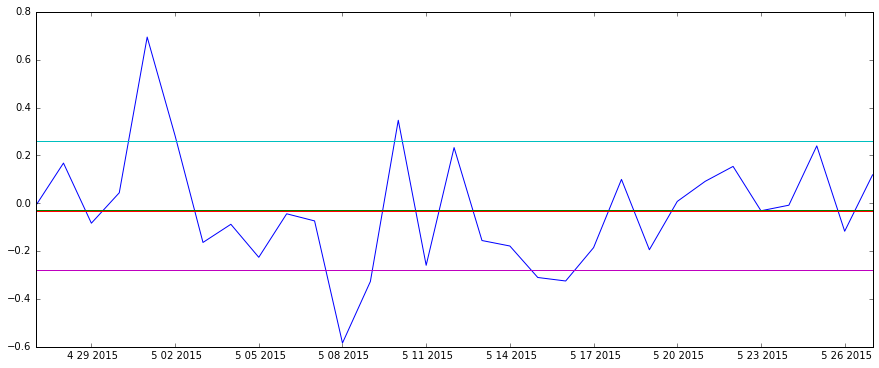

In [38]:
plt.plot(ts_log_diff[50:81])
avg = ts_log_diff[50:81].mean()
al_mean = ts_log_diff.mean()
plt.plot(ts_log_diff.index[50:81],[avg for x in range(31)])
plt.plot(ts_log_diff.index[50:81],[al_mean for x in range(31)])
gtavg = ts_log_diff[ts_log_diff.values > avg].mean()
plt.plot(ts_log_diff.index[50:81],[gtavg for x in range(31)])
ltavg = ts_log_diff[ts_log_diff.values < avg].mean()
plt.plot(ts_log_diff.index[50:81],[ltavg for x in range(31)])

In [34]:
arts[arts.plays == 8489]

,artist_id,plays
Ds,,
2015-03-05,03c6699ea836decbc5c8fc2dbae7bd3b,8489


# R

In [14]:
import rpy2.robjects as robjects

In [15]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages
# import R's utility package
utils = rpackages.importr('utils')
# select a mirror for R packages
#utils.chooseCRANmirror(ind=1) # select the first mirror in the list

In [16]:
# R package names
packnames = ('forecast', 'fpp')

# R vector of strings
from rpy2.robjects.vectors import StrVector
# file
packnames_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

In [16]:
forecats = rpackages.importr('forecast')
from rpy2.robjects import pandas2ri
from rpy2.robjects import r
import rpy2.robjects as ro
pandas2ri.activate()

In [22]:
rdf = pandas2ri.py2ri(trend)
ro.globalenv['r_timeseries'] = rdf
#pred_arima = ro.r('as.data.frame(forecast(auto.arima(r_timeseries),h=61))')
pred_arima = ro.r('as.data.frame(forecast(r_timeseries, h=61))')

In [23]:
import datetime

In [24]:
pred_arima['Point Forecast'] = pred_arima['Point Forecast'] - (trend.mean() - trend['20150801':].mean())

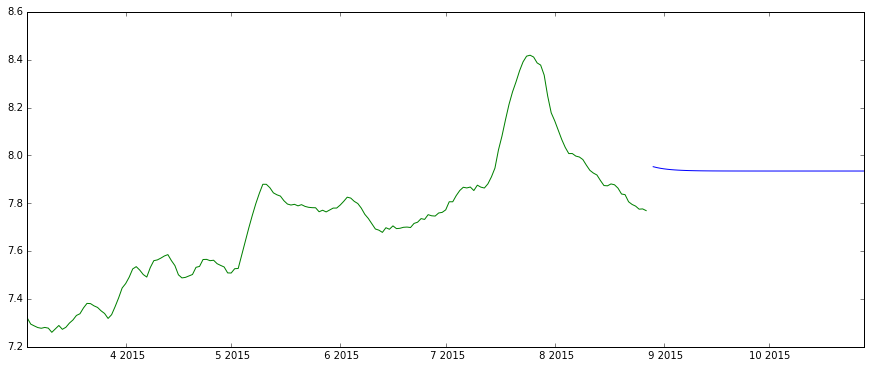

In [25]:
diff = [datetime.timedelta(int(x)) + datetime.date(2015, 3, 1) for x in pred_arima.index]
pred_arima['diff'] = diff
plt.plot(pred_arima['diff'], pred_arima['Point Forecast']) 
plt.plot(trend)
#plt.plot(trend.index, [trend.mean() for x in range(len(trend))])

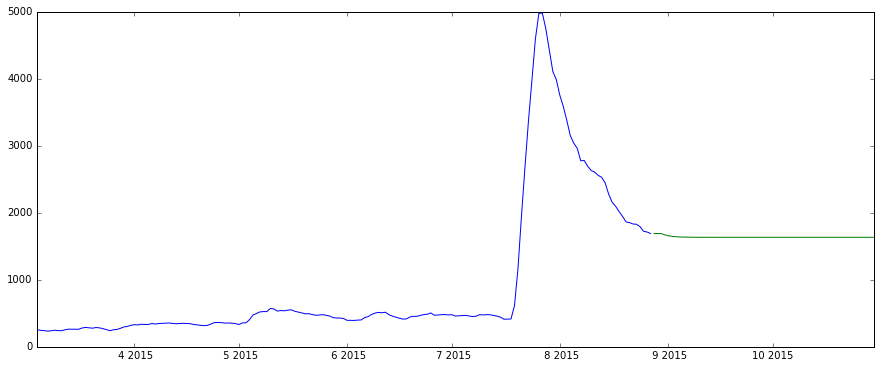

In [118]:
pred_ARIMA_diff_cumsum = pred_arima['Point Forecast'].cumsum()
pred_ARIMA_diff_cumsum.index = pd.date_range('20150831', '20151030')
ts_log.dropna(inplace=True)
pred_ARIMA_log = pd.Series(ts_log.ix[len(ts_log) - 1], index=pred.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA = np.exp(pred_ARIMA_log)
pred_ARIMA.dropna(inplace=True)
plt.plot(trend)
plt.plot(pred_ARIMA)

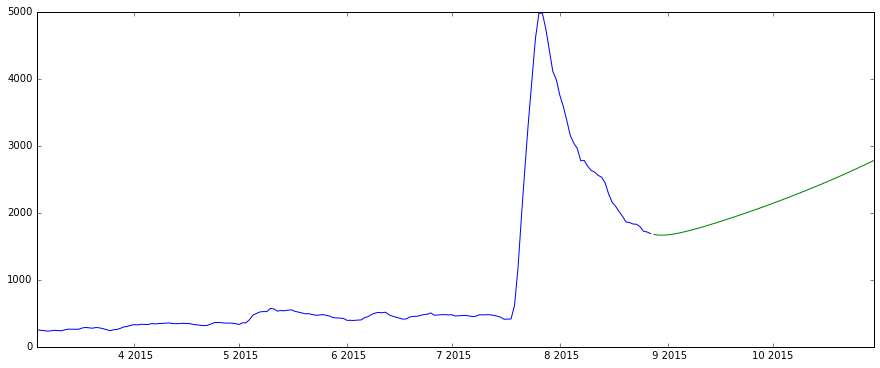

In [115]:
pred_ARIMA_diff_cumsum = pred.cumsum()
pred_ARIMA_log = pd.Series(ts_log.ix[len(ts_log) - 1], index=pred.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA = np.exp(pred_ARIMA_log)
plt.plot(trend)
plt.plot(pred_ARIMA)

In [50]:
residual.std()

295.05554214366873

In [51]:
residual.mean()

-0.51167086177860321

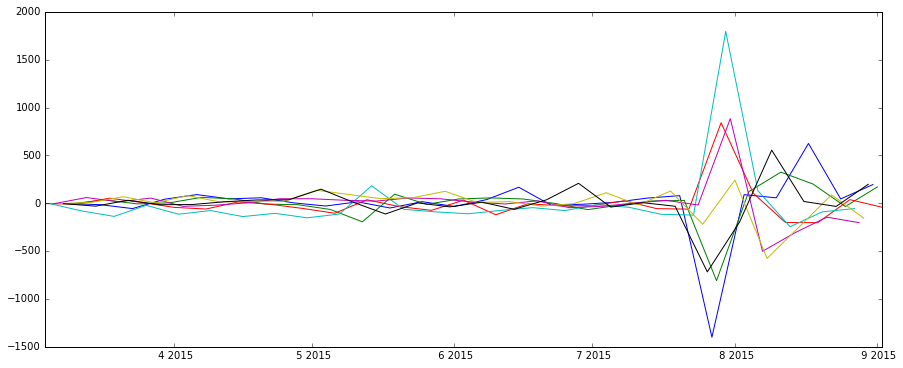

In [30]:
residuals = range(7)
frequs = ['W-MON', 'W-TUE', 'W-WED', 'W-THU', 'W-FRI', 'W-SAT', 'W-SUN']
for i in range(7):
    residuals[i] = residual.resample(frequs[i]).first()
for re in residuals:
    plt.plot(re)

In [31]:
import random
import math
random.gauss(0, 1)

0.3963641739861274

-0.511670861779
-3.95967858042
1.01110875494
2.81645088483
-0.909722110964
1.40590268745
-0.523673941623
-3.24498809344


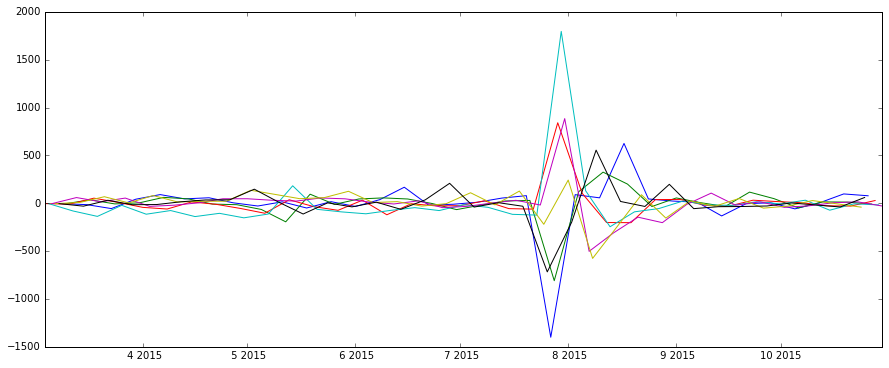

In [52]:
pred = range(7)
print residual.mean()
for i in range(7):
    pred[i] = pd.Series(index=pd.date_range('31/08/2015', '30/10/2015', freq=frequs[i]))
    for day in pred[i].index:
        mon_mean = residuals[i][2:].mean()
        mon_max = residuals[i].max()
        mon_min = residuals[i].min()
        mon_lim = 0
        if mon_max - mon_mean >= mon_mean - mon_min:
            mon_lim = mon_mean - mon_min
        else:
            mon_lim = mon_max - mon_mean
        prediction = random.gauss(mon_mean, math.sqrt(mon_lim*4))     # 正态分布
        #prediction = random.uniform(mon_mean - mon_lim/2.0, mon_mean + mon_lim/2.0)  # 均匀分布
        residuals[i][day] = prediction
        pred[i][day] = prediction
    plt.plot(residuals[i])
    print residuals[i].mean()

In [53]:
residuals[0].mean()

-3.9596785804208907

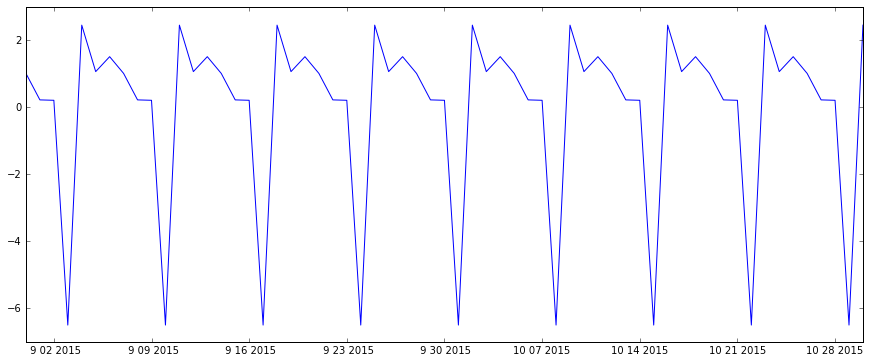

In [54]:
june = seasonal['20150601':'20150731']
june.index = pd.date_range('20150831', '20151030')
plt.plot(june)

In [31]:

pred_trend = pd.Series(index=pred_arima['diff'], data=pred_arima['Point Forecast'].values)
pred_trend = pred_trend[pd.date_range('20150901', '20151030')]
pred_trend.head()

2015-09-01    1666.900735
2015-09-02    1669.490940
2015-09-03    1671.772248
2015-09-04    1673.561592
2015-09-05    1674.809387
Freq: D, dtype: float64

-0.511670861779
-0.387857251089


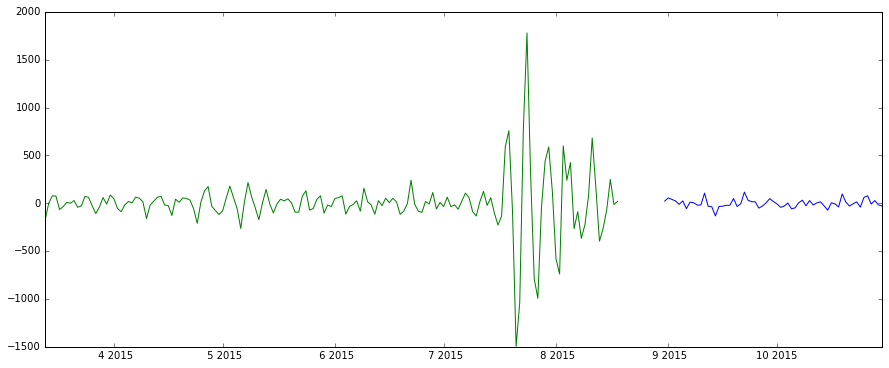

In [55]:
pred_resi = pd.concat(pred)
pred_resi = pred_resi.sort_index()
print residual.mean()
print pred_resi.mean()
plt.plot(pred_resi)
plt.plot(residual)

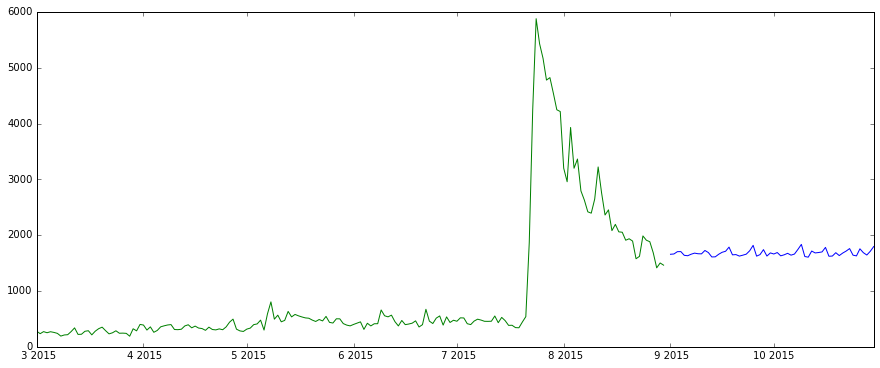

In [33]:
pred_all = pred_resi + pred_trend + june
plt.plot(pred_all)
plt.plot(ts)

In [136]:
pred_all = pred_all[pd.date_range('20150901', '20151030')]

In [128]:
a = pd.DataFrame()
a['Ds'] = pred_all.index
a['plays'] = pred_all.values
a['plays'] = a['plays'].astype('int')
a.to_csv('datas/temp.csv', index=False)

In [133]:
d = pred_all.index

In [145]:
idx = [pd.datetime.strftime(x ,format='%Y%m%d') for x in pred_all.index]

In [148]:
arts['artist_id'].unique()

array(['023406156015ef87f99521f3b343f71f',
       '025943df23acf5d3863b35fa6e0d79ec',
       '03c6699ea836decbc5c8fc2dbae7bd3b',
       '099cd99056bf92e5f0e384465890a804',
       '0c80008b0a28d356026f4b1097041689',
       '1339f978614ff19cd48f07e5420556d4',
       '1731019fbaa825714d5f8e61ad1bb7ff',
       '25739ad1c56a511fcac86018ac4e49bb',
       '28e32be6ba67e0c6fdfdff80ce07dfd4',
       '2b7fedeea967becd9408b896de8ff903',
       '2e14d32266ee6b4678595f8f50c369ac',
       '2ec1450a1389d4e3fc2a9a76c9378bb3',
       '33fd0a2cfcfd24e114707bba71ca1de9',
       '34bc4bc49a725f2686a5cf9c89985798',
       '3964ee41d4e2ade1957a9135afe1b8dc',
       '3e395c6b799d3d8cb7cd501b4503b536',
       '40bbb0da5570702dd6ff3af5e9e3aea6',
       '445a257964b9689f115a69e8cc5dcb75',
       '4b8eb68442432c242e9242be040bacf9',
       '4ee3f9c90101073c99d5440b41f07daa',
       '4f3f68292e50f39cd8142733512c07d6',
       '53dd7de874e0999634c28cdd94d21257',
       '5e2ef5473cbbdb335f6d51dc57845437',
       '61d

In [47]:
residual.dropna(inplace=True)